# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?" # lat={lat}&lon={lon}&appid={API key}
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units="+units+"&q="+ city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        weather_json = city_weather.json()
        # weather_json =requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json["coord"]["lat"]
        city_lng = weather_json["coord"]["lon"]
        city_max_temp = weather_json["main"]["temp_max"]
        city_humidity = weather_json["main"]["humidity"]
        city_clouds = weather_json["clouds"]["all"]
        city_wind = weather_json["wind"]["speed"]
        city_country = weather_json["sys"]["country"]
        city_date = weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | cam ranh
Processing Record 3 of Set 1 | arraial do cabo
Processing Record 4 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 5 of Set 1 | paraiso
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | son la
Processing Record 11 of Set 1 | bicester
Processing Record 12 of Set 1 | sao filipe
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | maghama
City not found. Skipping...
Processing Record 15 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 16 of Set 1 | yerbogachen
Processing Record 17 of Set 1 | sola
Processing Record 18 of Set 1 | waingapu
Processing Record 19 of Set 1 | adrar
Processing Record 20 of Set 1 | along
Processing Record 21 of Set 1 | tabiauea
C

In [23]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [24]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atuona,-9.8000,-139.0333,25.12,78,0,5.55,PF,1667502894
1,cam ranh,11.9214,109.1591,24.98,83,20,2.06,VN,1667502895
2,arraial do cabo,-22.9661,-42.0278,20.92,64,75,4.63,BR,1667502896
3,paraiso,9.8383,-83.8656,22.95,80,100,1.18,CR,1667502898
4,butaritari,3.0707,172.7902,26.61,70,40,4.94,KI,1667502899


In [25]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [26]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atuona,-9.8000,-139.0333,25.12,78,0,5.55,PF,1667502894
1,cam ranh,11.9214,109.1591,24.98,83,20,2.06,VN,1667502895
2,arraial do cabo,-22.9661,-42.0278,20.92,64,75,4.63,BR,1667502896
3,paraiso,9.8383,-83.8656,22.95,80,100,1.18,CR,1667502898
4,butaritari,3.0707,172.7902,26.61,70,40,4.94,KI,1667502899


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

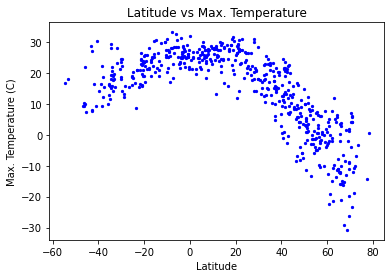

In [44]:
# Build scatter plot for latitude vs. temperature
latitude=city_data_df["Lat"]
temp=city_data_df["Max Temp"]

plt.scatter(latitude, temp, marker="o", s=5, color="blue")


# Incorporate the other graph properties
plt.title("Latitude vs Max. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max. Temperature (C)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

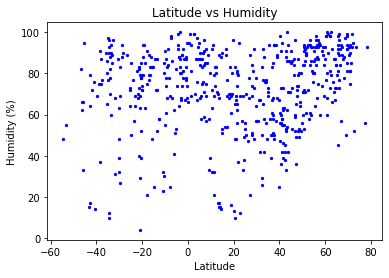

In [45]:
# Build the scatter plots for latitude vs. humidity
latitude=city_data_df["Lat"]
humidity=city_data_df["Humidity"]

plt.scatter(latitude, humidity, marker="o", s=5, color="blue")

# Incorporate the other graph properties
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

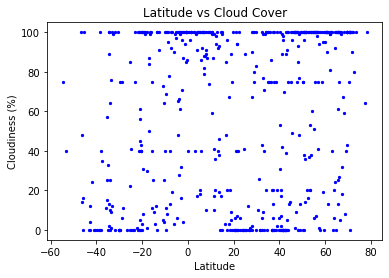

In [46]:
# Build the scatter plots for latitude vs. cloudiness
latitude=city_data_df["Lat"]
cloudiness=city_data_df["Cloudiness"]

plt.scatter(latitude, cloudiness, marker="o", s=5, color="blue")

# Incorporate the other graph properties
plt.title("Latitude vs Cloud Cover")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

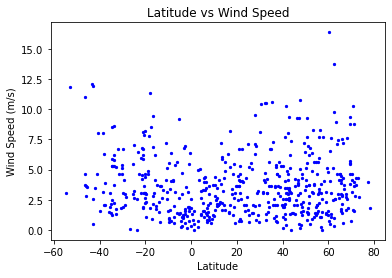

In [47]:
# Build the scatter plots for latitude vs. wind speed
latitude=city_data_df["Lat"]
wind_speed=city_data_df["Wind Speed"]

plt.scatter(latitude, wind_speed, marker="o", s=5, color="blue")

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [49]:
# Define a function to create Linear Regression plots
def plot_lin_regress(x_values,y_values,text_coordinates,y_title,title):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept #List of predicted y values

    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #Get string of lin regression line

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red") #add in regression equation
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_title)
    print(f"The r-value is: {rvalue}")
    plt.show()

In [50]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,cam ranh,11.9214,109.1591,24.98,83,20,2.06,VN,1667502895
3,paraiso,9.8383,-83.8656,22.95,80,100,1.18,CR,1667502898
4,butaritari,3.0707,172.7902,26.61,70,40,4.94,KI,1667502899
8,son la,21.3167,103.9000,14.08,80,94,0.92,VN,1667502904
9,bicester,51.9000,-1.1536,8.22,93,20,0.51,GB,1667502905


In [51]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atuona,-9.8000,-139.0333,25.12,78,0,5.55,PF,1667502894
2,arraial do cabo,-22.9661,-42.0278,20.92,64,75,4.63,BR,1667502896
5,rikitea,-23.1203,-134.9692,20.91,69,100,6.46,PF,1667502900
6,ushuaia,-54.8000,-68.3000,16.79,48,75,3.09,AR,1667502902
7,cape town,-33.9258,18.4232,21.86,78,10,5.81,ZA,1667502600


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8578727143219232


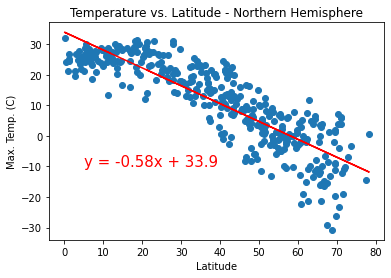

In [52]:
# Linear regression on Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Max Temp"]
plot_lin_regress(x_values,y_values,(5,-10),"Max. Temp. (C)","Temperature vs. Latitude - Northern Hemisphere")

The r-value is: 0.644651363978671


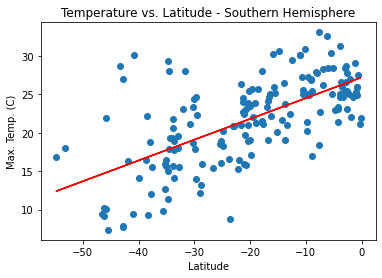

In [53]:
# Linear regression on Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Max Temp"]
plot_lin_regress(x_values,y_values,(-50,5),"Max. Temp. (C)","Temperature vs. Latitude - Southern Hemisphere")

**Discussion about the linear relationship:** There is a strong, negative correlation between maximum temperatures and latitude in the Northern Hemisphere (r=-0.86). Converesely, the correlation between maximum temperature and latitude is positive and moderate (0.64) in the Southern Hemisphere. This is consistent with the observation that, as we move progressively from the equator towards the poles (higher values of latitude in the Northern Hemisphere, and lower  values in the Souther Hemisphere), the temperature decreases. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2758758130691536


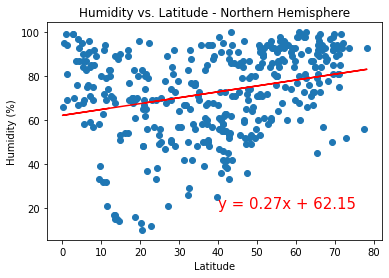

In [54]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Humidity"]
plot_lin_regress(x_values,y_values,(40,20),"Humidity (%)","Humidity vs. Latitude - Northern Hemisphere")

The r-value is: 0.19661602201601378


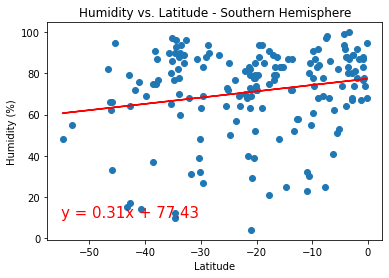

In [55]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Humidity"]
plot_lin_regress(x_values,y_values,(-55,10),"Humidity (%)","Humidity vs. Latitude - Southern Hemisphere")

**Discussion about the linear relationship:** In general, there is a weak, positive correlation between humidity and latitude for both the Northern and Souther Hemispheres (r of 0.28 and 0.20, respectively). This means that, for the time frame of consideration, humidity tends to increase as we move north from the South to the North Pole.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.12644351104321278


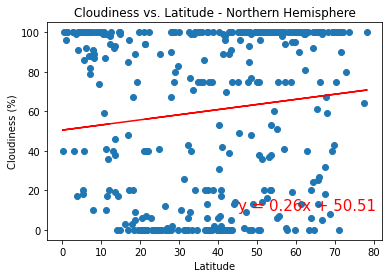

In [56]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Cloudiness"]
plot_lin_regress(x_values,y_values,(45,10),"Cloudiness (%)","Cloudiness vs. Latitude - Northern Hemisphere")

The r-value is: 0.3884150422384752


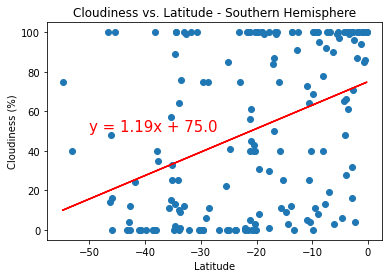

In [62]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Cloudiness"]
plot_lin_regress(x_values,y_values,(-50,50),"Cloudiness (%)","Cloudiness vs. Latitude - Southern Hemisphere")

**Discussion about the linear relationship:** In general, there is a weak, positive correlation between cloudiness and latitude as we move from the South Pole to the North Pole. This correlation has a value of 0.13 in the Northern Hemisphere and of 0.39 in the Southern Hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.17925062283742482


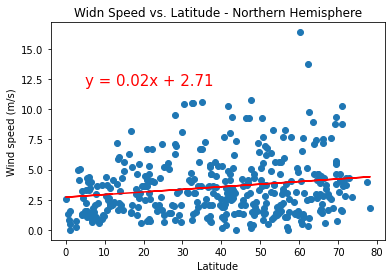

In [60]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Wind Speed"]
plot_lin_regress(x_values,y_values,(5,12),"Wind speed (m/s)","Widn Speed vs. Latitude - Northern Hemisphere")

The r-value is: -0.3182444297971784


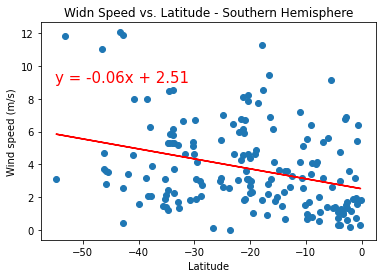

In [61]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Wind Speed"]
plot_lin_regress(x_values,y_values,(-55,9),"Wind speed (m/s)","Widn Speed vs. Latitude - Southern Hemisphere")

**Discussion about the linear relationship:** In general, there is a weak correlation between wind speed and latitude in both the Northern and Southern Hemisphere. In the Northern Hemisphere, the correlation is positive (r=0.18) and in the Southern Hemisphereas the correlation is negative (r=-0.32). 